### 1. Setup & Loading Data

In [1]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('Pokemon.csv')
df.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### 2. Data Exploration

In [2]:
# Basic information
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
None
                #      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.

### 3. Data Preprocessing

In [6]:
# Fill missing Type 2 with 'None'
df['Type 2'] = df['Type 2'].fillna('None')

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder

le_type1 = LabelEncoder()
le_type2 = LabelEncoder()
df['Type 1'] = le_type1.fit_transform(df['Type 1'].astype(str))
df['Type 2'] = le_type2.fit_transform(df['Type 2'].astype(str))

# Encode Legendary column (if it exists)
if 'Legendary' in df.columns:
    df['Legendary'] = df['Legendary'].astype(int)
else:
    print("Column 'Legendary' not found!")

### 4. Feature Selection

In [7]:
features = ['Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
target = 'Legendary'
X = df[features]
y = df[target]

### 5. Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6. Model Building

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 7. Evaluation

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       150
           1       0.64      0.90      0.75        10

    accuracy                           0.96       160
   macro avg       0.82      0.93      0.86       160
weighted avg       0.97      0.96      0.97       160

[[145   5]
 [  1   9]]


### 8. Visualization

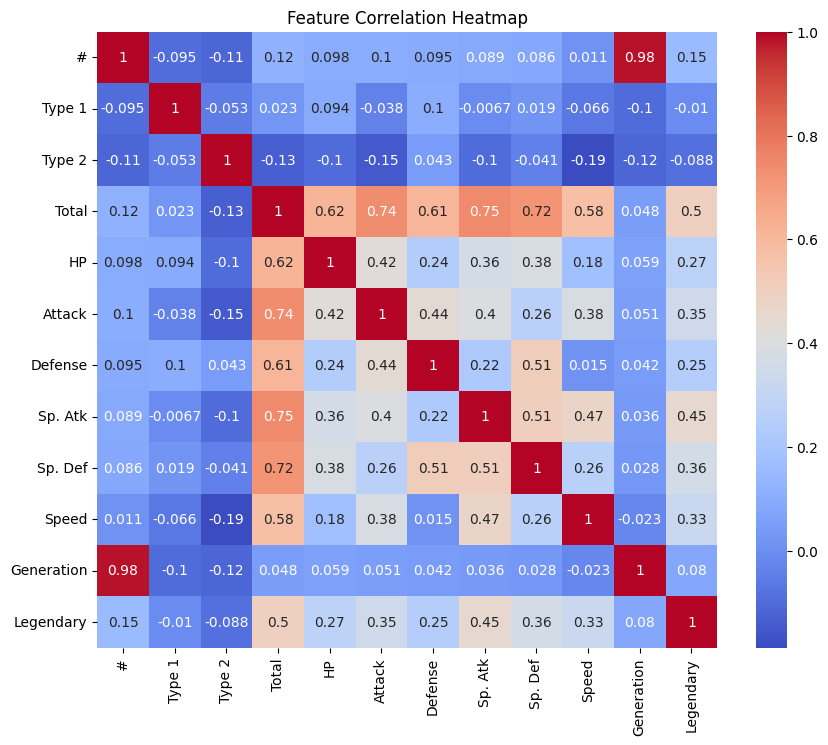

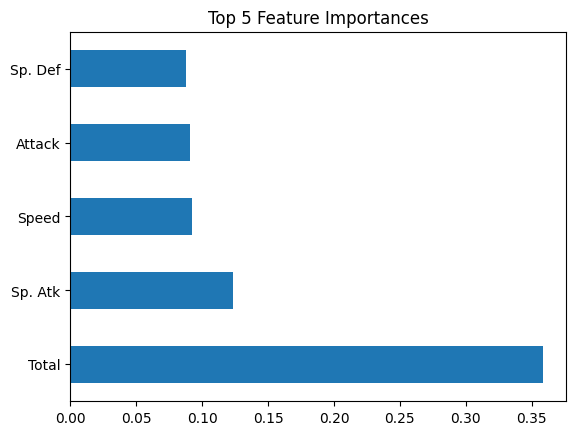

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Most important features
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features)
feature_importance.nlargest(5).plot(kind='barh')
plt.title('Top 5 Feature Importances')
plt.show()
